# 1-D EULER EQUATIONS

## This is a Jupyter Notebook plotting simulation output generated with Mara3 (https://github.com/jzrake/Mara3). The simulation evolves a 1-D Shock with zero gradient boundary conditions. 


In [164]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from exact_riemann import riemann, riemann_f

## Plot settings 

In [196]:
# Plotting settings
mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times']})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
plt.rcParams.update({'grid.alpha': 0.5})
mpl.rcParams['font.size'] = 25

## In the below we plot the density profile of the shock as it propagates along the grid.
## We also compute the exact Riemann solution of this problem to contrast with the numerical solution. We plot both to qualitatively see the effects of numerical diffusion and compare for a range of resolutions. In this step, we also compute the L2 error. Plotting of L2 will happen in the last cell.

### The plots, videos and L2 error arrays are stored in figures/res_XXXXX/ 

In [166]:
a = -1
b = 1
x0 = 0
rhoL = 1.
rhoR = 0.1
PL = 1.
PR = 0.125
gamma = 1.4
vR = 0
vL = 0

all_fps = glob.glob('vary_resolution/*')
for fp in all_fps:
    print(fp)
    res = fp.split('/')[-1]
    dirname = 'figures/' + res + '/'
    if os.path.exists(dirname):
        print("Path already exists: ", dirname)
    if not os.path.exists(dirname):
        print("Path doesn't exist, making new filepath: ", dirname)
        os.makedirs(dirname)

    for fl in glob.glob(fp + '/*.h5'):
        f = h5py.File(fl)
        density = []
        for j in range(0,len(f['conserved'])):
            density.append(f['conserved'][j][0])
            
        t = f['t'][...]
        N = len(f['conserved'])
        X, rho, v, P = riemann(a, b, x0, N, t, rhoL, vL, PL, rhoR, vR, PR, gamma)
        plt.figure(figsize=(10,7))
        plt.title(res + ', t = %.2f' %t)
        plt.plot(f['x'], density, label='Numerical')
        plt.plot(X, rho, label = 'Exact Riemann')
        plt.legend()
        plt.ylim([0.,1.2])
        plt.savefig(dirname + 'density_plot_%s.png' %fl[-7:-3])
        plt.close()
    
    cmd = 'ffmpeg -r 4 -f image2 -s 1920x1080 -i %sdensity_plot_' %(dirname) + r'%04d.png ' + '-vcodec libx264 -crf 25  -pix_fmt yuv420p %srho_%s.mp4' %(dirname, res)
    os.system(cmd)


vary_resolution/res_01600
Path already exists:  figures/res_01600/


/Users/magda/gradschool/CCA_summer_school/Mara3/examples/euler_1d/exact_riemann.py:50: RuntimeWarning: divide by zero encountered in true_divide
  xi = (X-x0)/float(T)


vary_resolution/res_00050
Path already exists:  figures/res_00050/
vary_resolution/res_00800
Path already exists:  figures/res_00800/
vary_resolution/res_00200
Path already exists:  figures/res_00200/
vary_resolution/res_00100
Path already exists:  figures/res_00100/
vary_resolution/res_00400
Path already exists:  figures/res_00400/


## Now we plot the numerical and exact density profiles of the shocks side by side for the resolutions tested. They will be put together in a video.

### The plots, videos and L2 error arrays are stored in figures/all_res/rho.mp4 

In [197]:
a = -1
b = 1
x0 = 0
rhoL = 1.
rhoR = 0.1
PL = 1.
PR = 0.125
gamma = 1.4
vR = 0
vL = 0

all_fps = glob.glob('vary_resolution/res_*')
all_res = sorted([int(j.split('/')[-1][4:]) for j in all_fps])

dirname = 'figures/all_res'

if os.path.exists(dirname):
    print("Path already exists: ", dirname)
if not os.path.exists(dirname):
    print("Path doesn't exist, making new filepath: ", dirname)
    os.makedirs(dirname)

for i in range(0,51):
    
    fig = plt.figure(figsize=(25,20))
    ax = fig.add_subplot(111) 
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    n = 1
    for res in all_res:
        fp = 'vary_resolution/res_%05d/diagnostics.%04d.h5' %(res,i)
        f = h5py.File(fp)
        density = []
        for j in range(0,len(f['conserved'])):
            density.append(f['conserved'][j][0])

        t = f['t'][...]
        N = len(f['conserved'])
        X, rho, v, P = riemann(a, b, x0, N, t, rhoL, vL, PL, rhoR, vR, PR, gamma)
        
        fig.add_subplot(int(np.ceil(len(all_res)/2.)),2,n)
        plt.title("N = %d" %res)
        plt.plot(f['x'], density, label='Numerical')
        plt.plot(X, rho, label = 'Exact Riemann')
        plt.legend()
        plt.ylim([0.,1.2])

        n+=1
        
    ax.set_xlabel('x')
    ax.set_ylabel(r'$\rho$')
    plt.tight_layout()
    plt.savefig(dirname + '/rho_%04d.png' %i)
    plt.close()

cmd = 'ffmpeg -r 4 -f image2 -s 1920x1080 -i %s/rho_' %dirname + r'%04d.png ' + '-vcodec libx264 -crf 25  -pix_fmt yuv420p %s/rho.mp4' %dirname
os.system(cmd)


/Users/magda/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/magda/gradschool/CCA_summer_school/Mara3/examples/euler_1d/exact_riemann.py:50: RuntimeWarning: divide by zero encountered in true_divide
  xi = (X-x0)/float(T)


0

## Finally we look at the L2 error as a function of resolution.

Text(0, 0.5, 'L2')

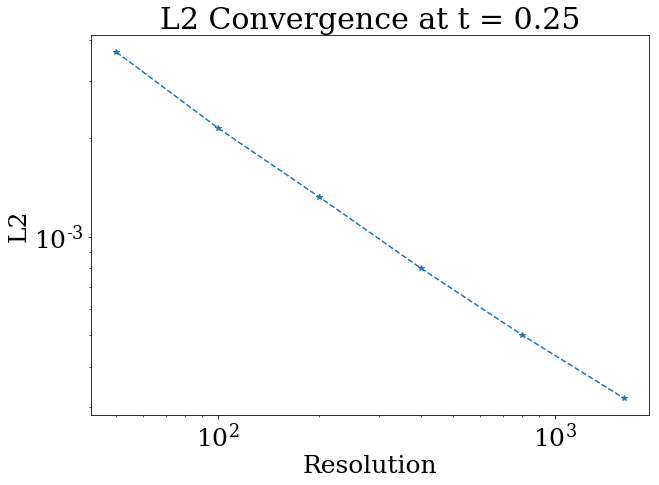

In [176]:
def L2(numerical, exact, dx):
    return np.sum((numerical-exact)**2 * dx)

a = -1
b = 1
x0 = 0
rhoL = 1.
rhoR = 0.1
PL = 1.
PR = 0.125
gamma = 1.4
vR = 0
vL = 0

#Specify a snapshot to look at:
i = 25

all_fps = glob.glob('vary_resolution/res_*/*%d.h5' %i)

resolutions = []
L2_error = []

for fp in all_fps:
    res = fp.split('/')[-2][4:]
    resolutions.append(int(res))
    f = h5py.File(fp)
    
    density_numeric = []
    for j in range(0,len(f['conserved'])):
        density_numeric.append(f['conserved'][j][0])
    dx = f['x'][1] - f['x'][0]

    t = f['t'][...]
    N = len(f['conserved'])
    X, density_exact, v, P = riemann(a, b, x0, N, t, rhoL, vL, PL, rhoR, vR, PR, gamma)
    
    L2_error.append(L2(density_numeric, density_exact, dx))
    
inds = np.argsort(resolutions)
resolutions = np.array(resolutions)[inds]
L2_error = np.array(L2_error)[inds]

plt.figure(figsize=(10,7))
plt.title('L2 Convergence at t = %.2f' %t)
plt.loglog(resolutions, L2_error, '*', linestyle = '--')
plt.xlabel("Resolution")
plt.ylabel("L2")
    